###This notebook first simulates and then solves a game I play with my young daughter often. In this game you roll a die, if you roll a die with a color you take a fruit of that color from its tree. There are 4 types of these fruits. One other side of the die is the raven. If you roll the raven 5 times before getting all the fruits from the trees you lose. The last die is a basket where you choose which color you would like to would like to take from the tree. And this choice is what is being investigated in terms of win percentages. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from first_orchard_solver.gameplay.gamesims import run_batches
from first_orchard_solver.gameplay.gamesolver import win_perc, win_perc_comp

In [2]:
batches = run_batches(10000, 100)

###run_batches simulates playing many batches of games using different strategies. The different strategies pertain to when you have a choice of moving a fruit of your choice from the basket, you can choose one at random (random_strategy), from one of the fruit type that have the most left (largest_strategy), or from one of the fruit type that have the least left (smallest_strategy). run_batches lets the user run x number of batches of x number of games. In the above code I set it for 10000 batches of 100 games for a total of 1000000 games. And this is for each strategy for a total of 3000000 games played with three different strategies

In [3]:
small_mean = np.mean(batches.smallest_results)
print(f"Smallest mean: {small_mean}")

Smallest mean: 55.4916


In [4]:
large_mean = np.mean(batches.largest_results)
print(f"Largest mean: {large_mean}")

Largest mean: 63.1579


In [5]:
random_mean = np.mean(batches.random_results)
print(f"Random mean: {random_mean}")

Random mean: 59.6068


In [6]:
print("Difference of largest strategy and smallest strategy: ", 
      large_mean - small_mean)
print("Difference of largest strategy and random: ", large_mean - random_mean)
print("Difference of random strategy and smallest strategy: ", random_mean - small_mean)

Difference of largest strategy and smallest strategy:  7.6663
Difference of largest strategy and random:  3.551099999999998
Difference of random strategy and smallest strategy:  4.1152000000000015


###This shows that picking fruit with the largest amount is the best strategy, at least determined by Monte Carlo Methods

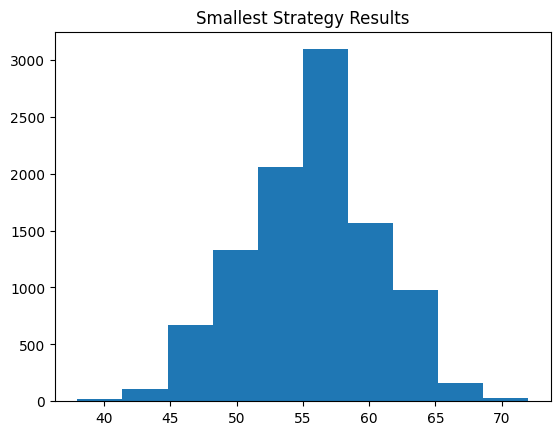

In [7]:
plt.hist(batches.smallest_results)
plt.title('Smallest Strategy Results')
plt.show()

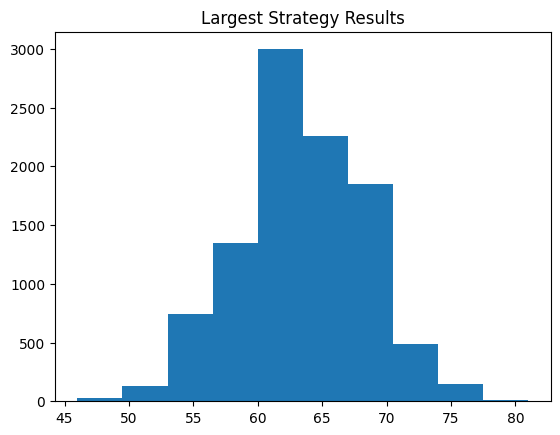

In [8]:
plt.hist(batches.largest_results)
plt.title('Largest Strategy Results')
plt.show()

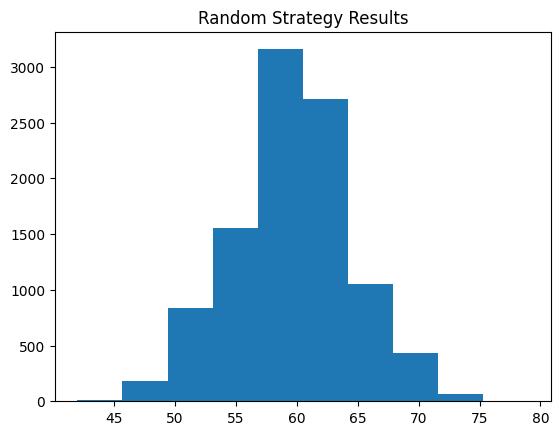

In [9]:
plt.hist(batches.random_results)
plt.title('Random Strategy Results')
plt.show()

In [10]:
win_perc((4,4,4,4), 5, "large")

(0.632, 0.368)

In [11]:
win_perc((4,4,4,4), 5, "small")

(0.555, 0.445)

In [12]:
win_perc((4,4,4,4), 5, "random")

(0.598, 0.402)

In [13]:
win_perc_comp((4,3,3,4,), 5, (4,2,4,4), 5)

The first scenario is 1.10% better than the second scenario. You are expected to win 70.20% of the time.
